In [27]:
from PIL import Image
import numpy as np
import glob
from skimage.io import imread
from scipy import misc
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [16]:
image_name = []
image_list = []
img = []
for filename in glob.glob('/Users/sean/Python/HPEImages/*.jpg'): #assuming gif
    name = filename[filename.rfind('/') + 1:filename.rfind('.') -1]
    image_name.append(name)
    im=Image.open(filename)
    image_list.append(im)
    img_temp = np.array(imread(filename))
    img_temp = misc.imresize(img_temp,(50,50))
    img.append(img_temp)

img = np.array(img)
img = img / 255.
img

array([[[[ 0.86666667,  0.85490196,  0.82745098],
         [ 0.86666667,  0.85490196,  0.82745098],
         [ 0.88235294,  0.86666667,  0.84313725],
         ..., 
         [ 0.81176471,  0.81176471,  0.80392157],
         [ 0.82745098,  0.82745098,  0.81960784],
         [ 0.82745098,  0.82745098,  0.81960784]],

        [[ 0.8745098 ,  0.8627451 ,  0.83529412],
         [ 0.86666667,  0.85490196,  0.82745098],
         [ 0.87843137,  0.8627451 ,  0.83921569],
         ..., 
         [ 0.82352941,  0.82352941,  0.81568627],
         [ 0.82745098,  0.82745098,  0.81960784],
         [ 0.83137255,  0.83137255,  0.82352941]],

        [[ 0.87843137,  0.86666667,  0.83921569],
         [ 0.8745098 ,  0.8627451 ,  0.83529412],
         [ 0.87843137,  0.8627451 ,  0.83921569],
         ..., 
         [ 0.82352941,  0.82352941,  0.81568627],
         [ 0.83137255,  0.83137255,  0.82352941],
         [ 0.83921569,  0.83921569,  0.83137255]],

        ..., 
        [[ 0.85098039,  0.84705882,

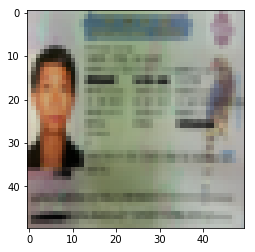

In [20]:
img_temp[1].shape
plt.imshow(img_temp)
plt.show()

In [21]:
label=[]
label.append(0)
num = 0
for i in range(len(image_name)-1):
    if image_name[i] == image_name[i+1]:
        label.append(num)
    else :
        num=num+1
        label.append(num)

In [22]:
def one(x,max_x):
    encode=np.zeros([len(x),max_x])
    encode[[i for i in range (len(x))], x]=1
    return encode

one_array = one(label , max(label) + 1 )

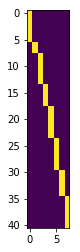

In [25]:
one_array[1].shape
plt.imshow(one_array)
plt.show()

In [31]:
__author__ = 'chapter'

def weight_varible(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


mnist = input_data.read_data_sets('/Users/sean/Python/HPEImages/MNIST', one_hot=True)
print("Download Done!")

sess = tf.InteractiveSession()

# paras
W_conv1 = weight_varible([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# conv layer-1
x = tf.placeholder(tf.float32, [None, 2500])
x_image = tf.reshape(x, [-1, 50, 50, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# conv layer-2
W_conv2 = weight_varible([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# full connection
W_fc1 = weight_varible([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# output layer: softmax
W_fc2 = weight_varible([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
y_ = tf.placeholder(tf.float32, [None, 10])

# model training
cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.arg_max(y_conv, 1), tf.arg_max(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.initialize_all_variables())

for i in range(1000):
    batch = mnist.train.next_batch(50)

    if i % 100 == 0:
        train_accuacy = accuracy.eval(feed_dict={x : img , y_: one_array, keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuacy))
    train_step.run(feed_dict = {x: img, y_: one_array, keep_prob: 0.5})

# accuacy on test
print("test accuracy %g"%(accuracy.eval(feed_dict={x : img, y_: one_array, keep_prob: 1.0})))

Extracting /Users/sean/Python/HPEImages/MNIST/train-images-idx3-ubyte.gz
Extracting /Users/sean/Python/HPEImages/MNIST/train-labels-idx1-ubyte.gz
Extracting /Users/sean/Python/HPEImages/MNIST/t10k-images-idx3-ubyte.gz
Extracting /Users/sean/Python/HPEImages/MNIST/t10k-labels-idx1-ubyte.gz
Download Done!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


ValueError: Cannot feed value of shape (41, 50, 50, 3) for Tensor 'Placeholder_9:0', which has shape '(?, 2500)'